In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('C:\\Users\\saran\\Downloads\\PythonForML_DS_Notes\\DATA\\gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

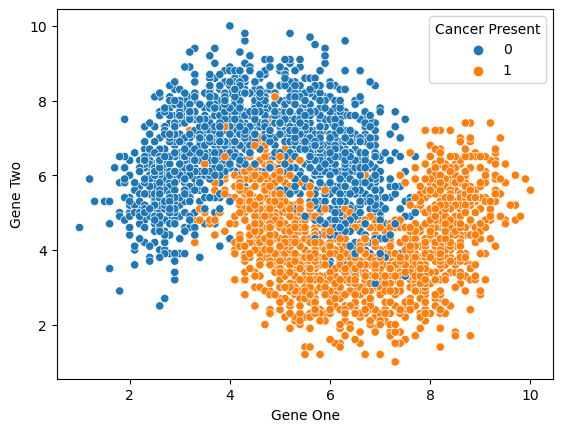

In [5]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present')

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

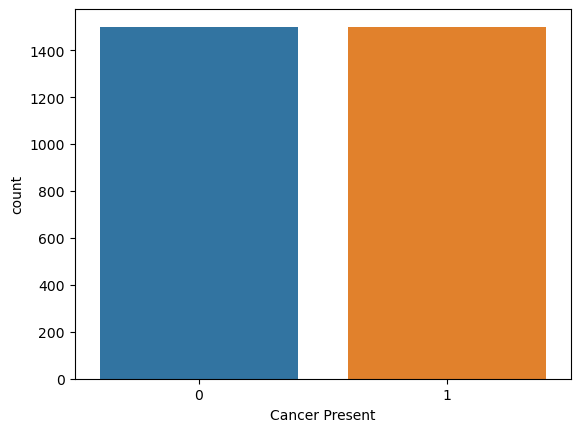

In [7]:
sns.countplot(x=df['Cancer Present'])

In [14]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [17]:
X_train.head()

,Gene One,Gene Two
2168,3.4,6.7
2906,2.9,7.4
917,9.0,2.8
939,2.5,5.7
2182,3.1,5.6


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

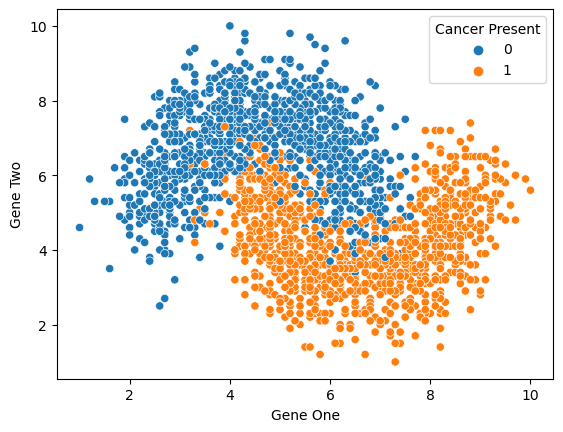

In [20]:
#training set visualisation 
sns.scatterplot(data=X_train,x='Gene One',y='Gene Two',hue=y_train)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

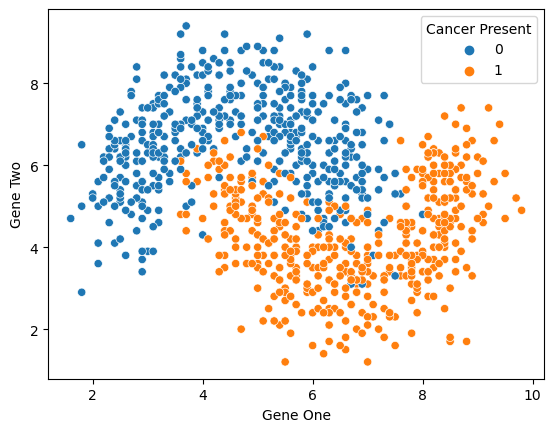

In [21]:
#test set visualisation
sns.scatterplot(data=X_test,x='Gene One',y='Gene Two',hue=y_test)

In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
X_train

array([[-1.18689784,  0.72822285],
       [-1.46220108,  1.12954533],
       [ 1.89649851, -1.50771669],
       ...,
       [-0.91159459,  1.30154068],
       [-0.03062421, -1.16372599],
       [-0.5812307 ,  1.30154068]])

In [27]:
X_test

array([[-1.79256498,  0.84288641],
       [ 0.63010358, -0.70507173],
       [ 2.3369837 , -0.30374925],
       ...,
       [-0.91159459,  1.12954533],
       [ 0.51998228, -2.19569809],
       [ 0.35480033, -1.56504847]])

In [40]:
def euclidean_distance(p1, p2):
    dist = 0
    for i in range(len(p1)):
        dist += (p1[i] - p2[i]) ** 2
    return math.sqrt(dist)

In [48]:
def knn_prediction(X_train,y_train,x_test,k):
    distances=[]
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    k_neighbors=distances[:k]
    #majority votes
    count=[0,0]
    for _,labels in k_neighbors:
        if(labels==0):
            count[0]+=1
        else:
            count[1]+=1
    if(count[0]>count[1]):
        return 0
    else:
        return 1


In [51]:
def knn_algorithm(X_train,y_train,X_test,y_test):
    error_rates=[]
    test_length=len(X_test)
    for k in range(1,30,2):
        acc_x=0
        for i,x in enumerate(X_test):
            test_pred=knn_prediction(X_train,y_train,x,k)
            if(test_pred==y_test.iloc[i]):
                acc_x+=1
        acc_x=acc_x/test_length
        error_rates.append(1-acc_x)
    return error_rates

In [52]:
error=knn_algorithm(X_train,y_train,X_test,y_test)

In [56]:
error

[0.09444444444444444,
 0.0755555555555556,
 0.07444444444444442,
 0.0755555555555556,
 0.07111111111111112,
 0.07333333333333336,
 0.06888888888888889,
 0.06888888888888889,
 0.06666666666666665,
 0.06666666666666665,
 0.06444444444444442,
 0.06777777777777783,
 0.06777777777777783,
 0.06555555555555559,
 0.06888888888888889]

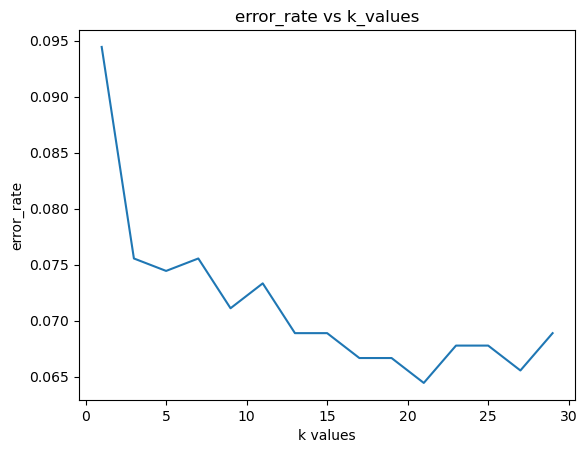

In [60]:
k_values = list(range(1, 30, 2))
plt.plot(k_values,error)
plt.xlabel('k values')
plt.ylabel('error_rate')
plt.title('error_rate vs k_values')
plt.savefig('Error_rate curve')

k=22 gives lowest error i.e. 0.065 but increases model complexity on the other hand k=12 gives nearly same error close to 0.065 also model complexity reduces,so by accuracy-complexity trde off k=12 is a good choice of k for this data set